# The Final Project

In this project, I will analyze and visualize banks stocks of 10 years

# Getting the Data

We will import proper libraries for the project

Pandas datareader allows us to read stock information directly from the internet.

In [13]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

# Data

We need to get data using pandas datareader. We will get stock infromation for the following banks:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [14]:
start = datetime.datetime(2012,1,1) #The start of the time for the data
end = datetime.datetime(2022,1,1)   #The end of the time for the data

Collecting the Data

"Yahoo" will be used as search engine

In [15]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

I will create a list of ticker symbols in alphabetical order 

In [16]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

We will use pandas' concat to merge the bank dataframes

In [17]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

We will set the columns names levels

In [18]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [19]:
bank_stocks.head()

Bank Ticker   BAC                                                   C  \
Stock Info   High   Low  Open Close       Volume Adj Close       High   
Date                                                                    
2012-01-03   5.89  5.74  5.75  5.80  246293200.0  4.904599  28.510000   
2012-01-04   5.88  5.62  5.71  5.81  243711200.0  4.913054  28.379999   
2012-01-05   6.35  5.71  5.75  6.31  547780000.0  5.335865  29.180000   
2012-01-06   6.30  6.06  6.21  6.18  299630600.0  5.225934  29.059999   
2012-01-09   6.37  6.19  6.26  6.27  240614400.0  5.302038  29.379999   

Bank Ticker                                   ...     MS             \
Stock Info         Low       Open      Close  ...   Open      Close   
Date                                          ...                     
2012-01-03   27.129999  27.129999  28.330000  ...  15.76  16.080000   
2012-01-04   27.620001  28.040001  28.170000  ...  15.75  15.940000   
2012-01-05   27.469999  27.660000  28.510000  ...  15.59  16.280001   
2012-01-06   28.010000  28.660000  28.549999  ...  16.08  15.900000   
2012-01-09   28.650000  28.719999  29.080000  ...  16.00  16.200001   

Bank Ticker                               WFC                        \
Stock Info       Volume  Adj Close       High        Low       Open   
Date                                                                  
2012-01-03   25777400.0  12.793264  28.520000  27.940001  27.940001   
2012-01-04   20699600.0  12.681882  28.690001  28.040001  28.340000   
2012-01-05   30615100.0  12.952387  29.580000  28.250000  28.500000   
2012-01-06   21677700.0  12.650056  29.080000  28.459999  28.840000   
2012-01-09   19102900.0  12.888738  29.379999  29.000000  29.150000   

Bank Ticker                                    
Stock Info       Close      Volume  Adj Close  
Date                                           
2012-01-03   28.430000  40071200.0  20.782007  
2012-01-04   28.559999  27519200.0  20.877039  
2012-01-05   29.020000  48435100.0  21.213297  
2012-01-06   28.940001  32303500.0  21.154816  
2012-01-09   29.299999  25720100.0  21.417971  

[5 rows x 36 columns]

What is the max Close price for each bank's stock throughout the time period?

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.369999
C       81.910004
GS     423.850006
JPM    171.779999
MS     105.449997
WFC     65.930000
dtype: float64

The returns DataFrame will contain the returns for each bank's stock

In [21]:
returns = pd.DataFrame()

In [22]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.001724,-0.005648,-0.006502,-0.000858,-0.008706,0.004573
2012-01-05,0.086059,0.012070,-0.001689,0.020887,0.021330,0.016106
2012-01-06,-0.020602,0.001403,-0.012265,-0.008969,-0.023342,-0.002757
2012-01-09,0.014563,0.018564,0.013595,-0.001697,0.018868,0.012439


What dates each bank stock had the best and the worst returns

In [24]:
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

In [25]:
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [26]:
returns.std()

BAC Return    0.019844
C Return      0.020432
GS Return     0.017531
JPM Return    0.016794
MS Return     0.020094
WFC Return    0.017874
dtype: float64

# Visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Close price of Each Bank for the entire time perios

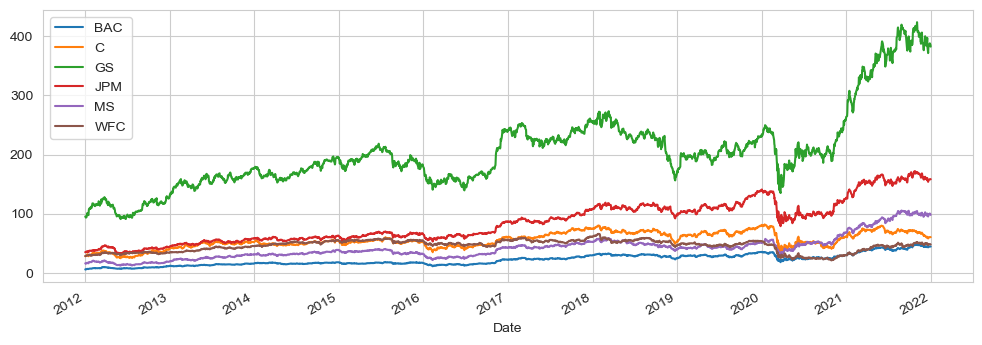

In [28]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

Creating a candle plot for each banks stock price from Jan 2021 to Jan 2022

In [29]:
BAC[['Open', 'High', 'Low', 'Close']]['2021-01-01':'2022-01-01'].iplot(kind='candle')

In [31]:
C[['Open', 'High', 'Low', 'Close']]['2021-01-01':'2022-01-01'].iplot(kind='candle')

In [32]:
GS[['Open', 'High', 'Low', 'Close']]['2021-01-01':'2022-01-01'].iplot(kind='candle')

In [33]:
JPM[['Open', 'High', 'Low', 'Close']]['2021-01-01':'2022-01-01'].iplot(kind='candle')

In [34]:
MS[['Open', 'High', 'Low', 'Close']]['2021-01-01':'2022-01-01'].iplot(kind='candle')

In [35]:
WFC[['Open', 'High', 'Low', 'Close']]['2021-01-01':'2022-01-01'].iplot(kind='candle')

# The End!